In [2]:
import pandas as pd

df_titanic = pd.read_csv("D:/PENS/Semester 4/Data Mining/titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
rows, cols= df_titanic.shape

print('Jumlah baris:', rows)
print('Jumlah kolom:', cols)

Jumlah baris: 418
Jumlah kolom: 12


In [4]:
data = df_titanic.loc[:, ['Name', 'Sex', 'Age', 'Pclass', 'Fare']]
data

,Name,Sex,Age,Pclass,Fare
0,"Kelly, Mr. James",male,34.5,3,7.8292
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,3,7.0000
2,"Myles, Mr. Thomas Francis",male,62.0,2,9.6875
3,"Wirz, Mr. Albert",male,27.0,3,8.6625
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3,12.2875
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,NaN,3,8.0500
414,"Oliva y Ocana, Dona. Fermina",female,39.0,1,108.9000
415,"Saether, Mr. Simon Sivertsen",male,38.5,3,7.2500
416,"Ware, Mr. Frederick",male,NaN,3,8.0500


In [5]:
Class = df_titanic.loc[:, ['Survived']]
Class

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [8]:
df_titanic["Relatives"] = df_titanic["SibSp"] + df_titanic['Parch']
df_titanic["Relatives"]

data = data.copy() 
data["Relatives"] = df_titanic["Relatives"]
data

,Name,Sex,Age,Pclass,Fare,Relatives
0,"Kelly, Mr. James",male,34.5,3,7.8292,0
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,3,7.0000,1
2,"Myles, Mr. Thomas Francis",male,62.0,2,9.6875,0
3,"Wirz, Mr. Albert",male,27.0,3,8.6625,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3,12.2875,2
...,...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,NaN,3,8.0500,0
414,"Oliva y Ocana, Dona. Fermina",female,39.0,1,108.9000,0
415,"Saether, Mr. Simon Sivertsen",male,38.5,3,7.2500,0
416,"Ware, Mr. Frederick",male,NaN,3,8.0500,0


In [9]:
passengers_of_pclass = df_titanic['Pclass'].value_counts()
passengers_of_pclass 

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [11]:
passengers_of_sex = df_titanic['Sex'].value_counts()
passengers_of_sex  

male      266
female    152
Name: Sex, dtype: int64

In [22]:
safe_per_pclass= df_titanic[df_titanic['Survived'] == 1].groupby('Pclass')["Survived"].count() 
unsafe_per_pclass= df_titanic[df_titanic['Survived'] == 0].groupby('Pclass')['Survived'].count()
print("Jumlah penumpang selamat pada masing masing", safe_per_pclass)
print()
print("Jumlah penumpang tidak selamat pada masing masing", unsafe_per_pclass)

Jumlah penumpang selamat pada masing masing Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64

Jumlah penumpang tidak selamat pada masing masing Pclass
1     57
2     63
3    146
Name: Survived, dtype: int64


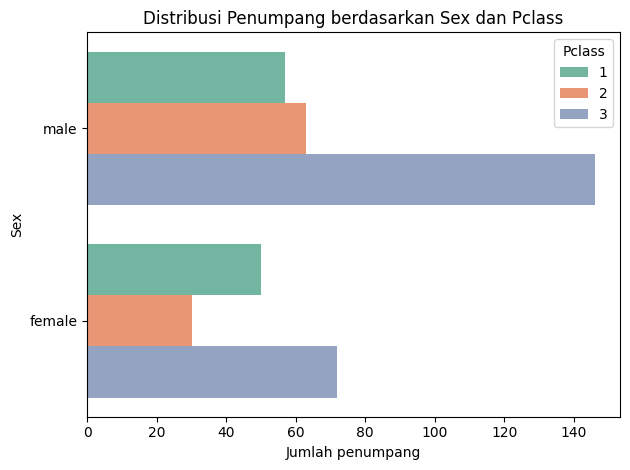

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot( y='Sex', hue= 'Pclass', data= df_titanic, palette = 'Set2')

plt.xlabel('Jumlah penumpang')
plt.ylabel('Sex')
plt.title('Distribusi Penumpang berdasarkan Sex dan Pclass')

plt.legend(title = 'Pclass')
plt.tight_layout()
plt.show()

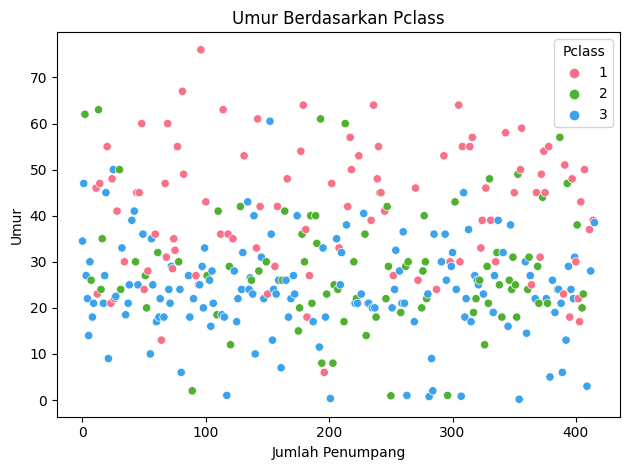

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset_cleaned = df_titanic.dropna(subset=['Age'])
custom_palette = sns.color_palette("husl", 3) 
sns.scatterplot(data=dataset_cleaned, x=dataset_cleaned.index,
                y='Age', hue="Pclass", palette=custom_palette)

plt.xlabel("Jumlah Penumpang")
plt.ylabel("Umur")
plt.title("Umur Berdasarkan Pclass")
plt.tight_layout()
plt.show()
